# Phase 4 Project Submission

- Student name: Lucas Wilkerson
- Student pace: Flex/part time
- Scheduled project review date/time:
- Instructor name: Morgan Jones


# Pneumonia Detection and Classification

## Project Overview




## Business Problem and Stakeholder



#import libraries


import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import tensorflow.keras as keras

from keras import models 
from keras import layers
from keras import optimizers 

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer


import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

import warnings
warnings.filterwarnings("ignore", message="`np.object`")


## Data Understanding

# Don't for get to check distribution, check for duplicates, nans
# get statistics if needed/useful 


# Define paths to import data
train_dir = 'chest_xray/train/'
val_dir = 'chest_xray/val/'
test_dir = 'chest_xray/test/'

train_normal_count = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
train_pneumonia_count = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
val_normal_count = len(os.listdir(os.path.join(val_dir, 'NORMAL')))
val_pneumonia_count = len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))
test_normal_count = len(os.listdir(os.path.join(test_dir, 'NORMAL')))
test_pneumonia_count = len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))

print("Train Data:")
print(f"Normal Images: {train_normal_count}")
print(f"Pneumonia Images: {train_pneumonia_count}")

print("\nValidation Data:")
print(f"Normal Images: {val_normal_count}")
print(f"Pneumonia Images: {val_pneumonia_count}")

print("\nTest Data:")
print(f"Normal Images: {test_normal_count}")
print(f"Pneumonia Images: {test_pneumonia_count}")

## Data Preparation/ Preprocessing

## Data Analysis/ Data Visualization

## Modeling

## Hyperparamater Tuning 

## Model Evaluation

## Conclusion and Recommendations

## Limitations

# Initial shallow neural network model

In [2]:
#Starting by building a shallow neural network

#importing necessary packages

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
import numpy as np
import os


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # This prevents kernel shut down due to xgboost conflict
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # This line prevents tf's comments about the optimizing your machine

In [3]:
# Directory path
train_dir = 'chest_xray/train/'
test_dir = 'chest_xray/test/'
val_dir = 'chest_xray/val/'

# Get all the data in the directory chest_xray/test (624 images) , and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
        test_dir, 
        target_size=(150, 150), batch_size=624)

# Get all the data in the directory chest_xray/train (5216 images) and reshape them
train_generator = ImageDataGenerator().flow_from_directory(
        train_dir, 
        target_size=(150, 150), batch_size=5216)

# Get all the data in the directory chest_xray/val (16 images), and reshape them
val_generator = ImageDataGenerator().flow_from_directory(
        val_dir, 
        target_size=(150, 150), batch_size=16)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Found 624 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## Inspect and Prepare Data

### Viewing some images from the datasets 

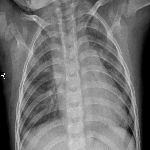

In [3]:
# Datasets are now six numpy arrays 

# Viewing image from train group

array_to_img(train_images[10])

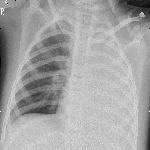

In [4]:
array_to_img(train_images[130])

In [7]:
sample_image = train_images[0]
sample_image

array([[[ 90.,  90.,  90.],
        [ 93.,  93.,  93.],
        [101., 101., 101.],
        ...,
        [ 46.,  46.,  46.],
        [ 46.,  46.,  46.],
        [ 13.,  13.,  13.]],

       [[ 88.,  88.,  88.],
        [105., 105., 105.],
        [109., 109., 109.],
        ...,
        [ 46.,  46.,  46.],
        [ 42.,  42.,  42.],
        [ 10.,  10.,  10.]],

       [[ 98.,  98.,  98.],
        [109., 109., 109.],
        [ 89.,  89.,  89.],
        ...,
        [ 46.,  46.,  46.],
        [ 35.,  35.,  35.],
        [ 10.,  10.,  10.]],

       ...,

       [[  4.,   4.,   4.],
        [ 18.,  18.,  18.],
        [ 37.,  37.,  37.],
        ...,
        [ 38.,  38.,  38.],
        [ 16.,  16.,  16.],
        [  3.,   3.,   3.]],

       [[  3.,   3.,   3.],
        [ 19.,  19.,  19.],
        [ 38.,  38.,  38.],
        ...,
        [ 39.,  39.,  39.],
        [ 17.,  17.,  17.],
        [  3.,   3.,   3.]],

       [[  3.,   3.,   3.],
        [ 19.,  19.,  19.],
        [ 38.,  

In [8]:
sample_label = train_labels[0]
sample_label

array([0., 1.], dtype=float32)

In [9]:
print(train_images.shape)
test_images.shape

(5216, 150, 150, 3)


(624, 150, 150, 3)

In [11]:
train_images_reshaped = train_images.reshape(67500, 5216).astype('float32')
test_images_reshaped = test_images.reshape(67500, 624).astype('float32')

In [12]:
print(train_images_reshaped.shape)
test_images_reshaped.shape

(67500, 5216)


(67500, 624)

In [13]:
# Normalizing image data 
# Scaling by dividing by each element by 255

train_images_reshaped /= 255.
test_images_reshaped /= 255.

In [14]:
# Preprocessing Our Labels 

# Viewing first 10 labels
train_labels[:10]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [16]:
# Viewing class indices
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [17]:
# Viewing shape of train and test labels
print(train_labels.shape)
test_labels.shape


(5216, 2)


(624, 2)

In [18]:
# Reshaping train labels
train_labels_final = train_labels.T[[1]]
np.shape(train_labels_final)

(1, 5216)

In [19]:
# Reshaping test labels
test_labels_final = test_labels.T[[1]]
np.shape(test_labels_final)

(1, 624)

In [20]:
train_labels_final[:10]

array([[1., 0., 1., ..., 1., 1., 1.]], dtype=float32)

### Building Model 

In [21]:
# Initial baseline model

model_1 = Sequential()
model_1.add(Dense(64, activation='tanh', input_shape=(5216,)))
model_1.add(Dense(10, activation='softmax'))

In [22]:
# Compiling model with following parameters
model_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])


In [23]:
# Inspecting model summary

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                333888    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 334,538
Trainable params: 334,538
Non-trainable params: 0
_________________________________________________________________


# First approach below

In [5]:
# Getting the shape of the data

print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))
print(np.shape(val_images))
print(np.shape(val_labels))

(5216, 150, 150, 3)
(5216, 2)
(624, 150, 150, 3)
(624, 2)
(16, 150, 150, 3)
(16, 2)


In [6]:
# Reshaping the train_images
train_img_unrow = train_images.reshape(5216, -1).T

#Previewing the shape of the train_img_unrow

np.shape(train_img_unrow)

(67500, 5216)

In [7]:
# Reshaping test_images
m = 624
test_img_unrow = test_images.reshape(m, -1).T

# Previewing the shape of test_img_unrow
np.shape(test_img_unrow)

(67500, 624)

In [8]:
# Reshaping val_images
val_img_unrow = val_images.reshape(16, -1).T

# Previewing the shape of test_img_unrow
np.shape(val_img_unrow)

(67500, 16)

In [9]:
# Viewing test_labels, train_labels, val_labels
train_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [10]:
# Viewing class indices
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [11]:
# Reshaping train labels
train_labels_final = train_labels.T[[1]]
np.shape(train_labels_final)

(1, 5216)

In [12]:
# Reshaping test labels
test_labels_final = test_labels.T[[1]]
np.shape(test_labels_final)

(1, 624)

In [13]:
# Reshaping val labels
val_labels_final = val_labels.T[[1]]
np.shape(val_labels_final)

(1, 16)

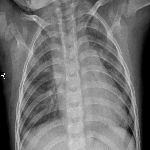

In [14]:
# Checking/ previewing image with label

array_to_img(train_images[10])



In [15]:
train_labels_final[:,10]

array([1.], dtype=float32)

## Standardize the data


In [16]:
#Remember that each RGB pixel in an image takes a value between 0 and 255. 
#In Deep Learning, it is very common to standardize and/or center your dataset. 
#For images, a common thing that is done is to make sure each pixel value is between 0 and 1. 
#This can be done by dividing the entire matrix by 255. 

In [17]:
# Standardizing the data

train_img_final = train_img_unrow/255
test_img_final = test_img_unrow/255
val_img_final = val_img_unrow/255

type(test_img_unrow)

numpy.ndarray

## Building Basic Logistic Regression-Based Neural Network

In [18]:
# Initializing b as a scalar with the value of 0
b = 0

# Initializing w by defining a function

def init_w(n):
    w = np.zeros((n, 1))
    return w


w = init_w(150*150*3)

In [19]:
# Forward Propagation

def propagation(w, b, x, y):
    l = x.shape[1]
    y_hat = 1/(1 + np.exp(- (np.dot(w.T, x) + b)))                                  
    cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))    
    dw = (1/l) * np.dot(x,(y_hat - y).T)
    db = (1/l) * np.sum(y_hat - y)
    return dw, db, cost


In [20]:
# Running function on train dataset
dw, db, cost = propagation(w, b, train_img_final, train_labels_final)

print(dw)

print(db)

print(cost)

[[-0.05110181]
 [-0.05110181]
 [-0.05110181]
 ...
 [-0.02937868]
 [-0.02937868]
 [-0.02937868]]
-0.2429064417177914
0.6931471805599453


In [21]:
# Optimization
# Update w and b 

# Defining optimization function

def optimization(w, b, x, y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        dw, db, cost = propagation(w, b, x, y)    
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Record the costs and print them every 50 iterations
        if i % 50 == 0:
            costs.append(cost)
        if print_cost and i % 50 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    return w, b, costs

In [22]:
# Running optimization function
w, b, costs = optimization(w, b, train_img_final, train_labels_final, 
                           num_iterations= 151, learning_rate = 0.0001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 50: 0.529941
Cost after iteration 100: 0.493746
Cost after iteration 150: 0.463483


In [23]:
# Make label predictions
# Creating function that makes label predictions
def prediction(w, b, x):
    l = x.shape[1]
    y_prediction = np.zeros((1, l))
    w = w.reshape(x.shape[0], 1)
    y_hat = 1/(1 + np.exp(- (np.dot(w.T, x) + b))) 
    p = y_hat
    
    for i in range(y_hat.shape[1]):
        if (y_hat[0,i] > 0.5): 
            y_prediction[0, i] = 1
        else:
            y_prediction[0, i] = 0
    return y_prediction

In [24]:
w = np.array([[0.035], [0.123], [0.217]])
b = 0.2
x = np.array([[0.2, 0.4, -1.2, -2], 
              [1, -2., 0.1, -1], 
              [0.2, 0.4, -1.2, -2]])

prediction(w, b, x)

array([[1., 1., 0., 0.]])

## The Overall Model

In [25]:
# Building the model

def model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    b = 0
    w = init_w(np.shape(x_train)[0]) 

    # Gradient descent (≈ 1 line of code)
    w, b, costs = optimization(w, b, x_train, y_train, num_iterations, learning_rate, print_cost)
    
    y_pred_test = prediction(w, b, x_test)
    y_pred_train = prediction(w, b, x_train)

    # Print train/test errors
    print('train accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
    print('test accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

    output = {'costs': costs, 
              'y_pred_test': y_pred_test,  
              'y_pred_train' : y_pred_train,  
              'w' : w, 
              'b' : b, 
              'learning_rate' : learning_rate, 
              'num_iterations': num_iterations}
    
    return output

In [26]:
# Running the model
output = model(train_img_final, train_labels_final, test_img_final, test_labels_final,
               num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147


<ipython-input-19-eea2987a392b>:6: RuntimeWarning: divide by zero encountered in log
  cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))
<ipython-input-19-eea2987a392b>:6: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))


Cost after iteration 50: 3.446588
Cost after iteration 100: nan
Cost after iteration 150: nan
Cost after iteration 200: 0.215157
Cost after iteration 250: 0.182180
Cost after iteration 300: nan
Cost after iteration 350: 0.175833
Cost after iteration 400: 0.155291
Cost after iteration 450: 0.141642
Cost after iteration 500: 0.132090
Cost after iteration 550: 0.125250
Cost after iteration 600: 0.120236
Cost after iteration 650: 0.116441
Cost after iteration 700: 0.113444
Cost after iteration 750: 0.110962
Cost after iteration 800: 0.110268
Cost after iteration 850: 0.120192
Cost after iteration 900: 0.114449
Cost after iteration 950: 0.110477
Cost after iteration 1000: 0.107543
Cost after iteration 1050: 0.105230
Cost after iteration 1100: 0.127746
Cost after iteration 1150: 0.105470
Cost after iteration 1200: nan
Cost after iteration 1250: 0.106541
Cost after iteration 1300: 0.103251
Cost after iteration 1350: 0.100811
Cost after iteration 1400: 0.098875
Cost after iteration 1450: 0.097

In [27]:
# Train Accuracy of 96.7 %
# Test Accuracy of 74.7 % 

# From the results we can see that the model does seem to be overfitting onto the training data 

# Build Neural Network with Keras Example

# Importing necessary classes
from keras import models
from keras import layers
from keras import optimizers

# Deciding on network architecture 

model = models.Sequential()

# Add layers 
model.add(layers.Dense(units, activation, input_shape))

# Compile model 
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='mse',
              metrics=['accuracy'])

# Train the model 

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# For plotting can return a history on how training went 

history.history

# Or for loss specifically 

history.history['loss']

# Making predictions 
y_hat = model.predict(x)

# Evaluating the model- train data
model.evaluate(X_train, X_train_labels)

# Evaluating the model- test data
model.evaluate(X_test, X_test_labels)

# Image Classification with Multi-Layer Perceptron using Keras

In [29]:
# Importing necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # This prevents kernel shut down due to xgboost conflict
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # This line prevents tf's comments about the optimizing your machine

In [32]:
# train_img_final, train_labels_final 
# test_img_final, test_labels_final
# val_img_final, val_labels_final 


#Previewing image using Matplotlib
sample_image = train_img_final[0]
sample_label = train_labels_final[0]


In [33]:
sample_image

array([0.07450981, 0.01176471, 0.16078432, ..., 0.35686275, 0.        ,
       0.        ], dtype=float32)

In [34]:
 train_img_final.shape

(67500, 5216)